In [73]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [35]:
path_input = 'C:\Data\linear_regression\linear.csv'

In [36]:
df = pd.read_csv(path_input)

In [37]:
# X as a matrix, y as a vector
X = df[['x']]
y = df['y']

In [38]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [39]:
print('coefficient: ' + str(lm.coef_[0]))
print('intercept: ' + str(lm.intercept_))

coefficient: 5.643158465152821
intercept: 1.9454048465374996


In [40]:
# Predicitons
y_hat = lm.predict(X)
df['y_hat'] = y_hat

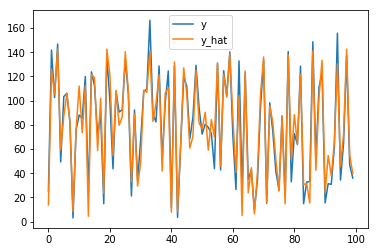

In [41]:
df[['y', 'y_hat']].plot()

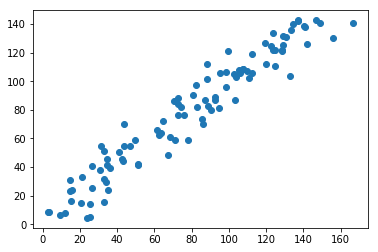

In [42]:
fig, ax = plt.subplots()
ax.scatter(df['y'], df['y_hat'])

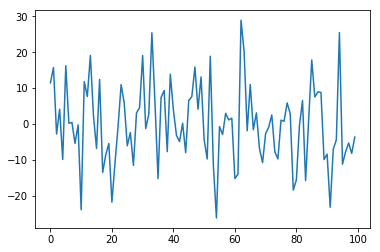

In [43]:
df['error'] = df['y'] - df['y_hat']
df['error'].plot()

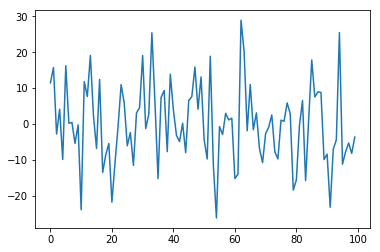

In [44]:
fig, ax = plt.subplots()
df['error'].plot(ax=ax)

## Gender Weight Height example

In [45]:
gen_path = 'C:\Data\linear_regression\gender_cleaned.csv'
gendf = pd.read_csv(gen_path)

In [46]:
height = gendf[['Height']]
weight = gendf['Weight']

In [47]:
lm = LinearRegression()
lm.fit(height, weight)

print('coefficient: ' + str(lm.coef_[0]))
print('intercept: ' + str(lm.intercept_))

coefficient: 1.3793892082443826
intercept: -159.23468508419876


In [63]:
h = 180

w = lm.coef_[0]*h + lm.intercept_

print('The predicted weight for a height of {}cm is {}kg'.format(h, round(w, 2)))

The predicted weight for a height of 180cm is 89.06kg


In [52]:
weight_hat = lm.predict(height)
gendf['weight_hat'] = weight_hat

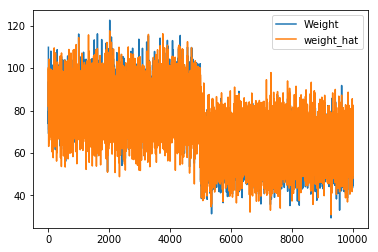

In [55]:
gendf[['Weight', 'weight_hat']].plot()

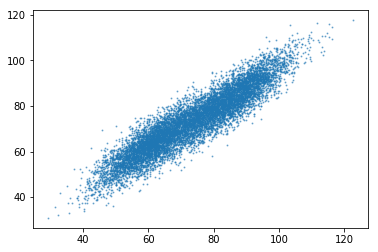

In [72]:
fig, ax = plt.subplots()
ax.scatter(gendf['Weight'], gendf['weight_hat'], s=1, alpha=0.5)

In [53]:
gendf.head()

,IsMale,Height,Weight,identifier,entry_dt,weight_hat
0,1,187.571423,109.819678,A001,2017-01-20,99.499312
1,1,174.706036,73.688955,A002,2017-01-20,81.752936
2,1,188.239668,96.584348,A003,2017-01-20,100.421081
3,1,182.196685,99.899282,A004,2017-01-20,92.085456
4,1,177.499761,93.682809,A005,2017-01-20,85.606570


### Logistic Regression
Predict gender from height and weight

In [89]:
lgr = LogisticRegression()
X = gendf[['Height', 'Weight']]
y = gendf['IsMale']
lfit = lgr.fit(X, y)

In [90]:
print('coefficient: ' + str(lgr.coef_[0]))
print('intercept: ' + str(lgr.intercept_))

coefficient: [-0.18835681  0.43351669]
intercept: [-0.00340013]


In [91]:
gender_hat = lgr.predict(X)
gendf['gender_hat'] = gender_hat

In [92]:
gender_hat_pp = lgr.predict_proba(X)[:,1]
gendf['gender_hat_pp'] = gender_hat_pp

In [95]:
gendf.tail(50)

,IsMale,Height,Weight,identifier,entry_dt,weight_hat,gender_hat,gender_hat_pp
9950,0,155.221240,56.017378,A9951,2017-01-20,54.875819,0,0.006992
9951,0,162.832441,62.983756,A9952,2017-01-20,65.374627,0,0.033263
9952,0,160.081481,60.839694,A9953,2017-01-20,61.579982,0,0.022296
9953,0,155.647007,60.170540,A9954,2017-01-20,55.463117,0,0.037846
9954,0,151.635522,50.461308,A9955,2017-01-20,49.929717,0,0.001243
9955,0,165.840115,64.377693,A9956,2017-01-20,69.523380,0,0.034499
9956,0,159.688698,63.695312,A9957,2017-01-20,61.038182,0,0.078069
9957,0,159.775447,65.407929,A9958,2017-01-20,61.157842,0,0.148962
9958,0,159.941081,57.287988,A9959,2017-01-20,61.386316,0,0.004996
9959,0,172.581216,73.221954,A9960,2017-01-20,78.821982,0,0.317062


In [81]:
sum(gendf.IsMale)

5000

In [82]:
sum(gendf.gender_hat)

5013